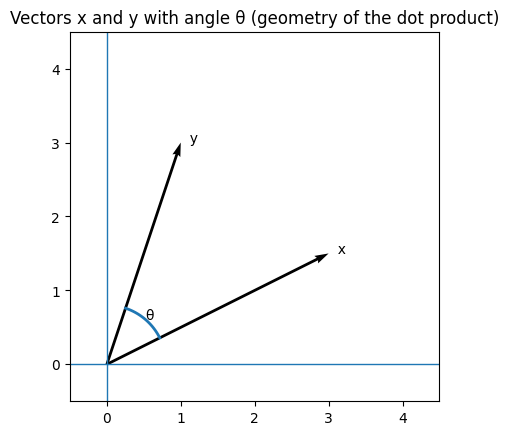

Dot product x·y = 7.5
||x||_2 = 3.354 ||y||_2 = 3.162
cos θ = 0.7071 θ (deg) = 45.0


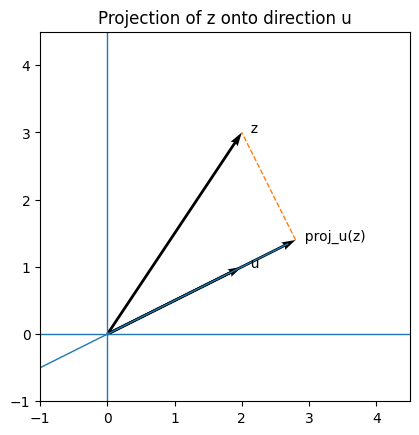

alpha = 1.4
proj_u(z) = [2.8 1.4]
residual z - proj = [-0.8  1.6]
Orthogonality check proj·residual ≈ 0: True value = 4.440892098500626e-16


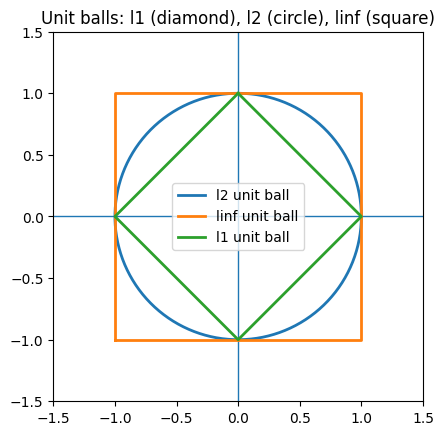

Cosine invariance to positive scaling: -0.16666666666666669 -0.16666666666666666
Norms on v=[3,-4,1]: ||.||1, ||.||2, ||.||inf = 8.0 5.0990195135927845 4.0
Cauchy–Schwarz holds (lhs ≤ rhs): True lhs= 1.0838 rhs= 1.8912


In [2]:
# Expanded visuals + runnable examples for Vectors, Norms, and Inner Products
import numpy as np
import matplotlib.pyplot as plt

rng = np.random.default_rng(0)

# ---------- 1) Vector geometry: angle & dot product ----------
x = np.array([3.0, 1.5])
y = np.array([1.0, 3.0])

def plot_vectors_and_angle(x, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.set_aspect('equal', adjustable='box')
    ax.quiver(0, 0, x[0], x[1], angles='xy', scale_units='xy', scale=1)
    ax.quiver(0, 0, y[0], y[1], angles='xy', scale_units='xy', scale=1)
    ax.set_xlim(-0.5, max(4, x[0], y[0]) + 0.5)
    ax.set_ylim(-0.5, max(4, x[1], y[1]) + 0.5)
    ax.set_title("Vectors x and y with angle θ (geometry of the dot product)")

    # draw small arc for the angle between x and y at the origin
    # compute unit vectors
    x_u = x / np.linalg.norm(x)
    y_u = y / np.linalg.norm(y)
    # angle between them
    cos_th = np.clip(x_u @ y_u, -1, 1)
    theta = np.arccos(cos_th)
    # parametric arc from x_u to y_u (shorter arc)
    npts = 100
    # choose rotation direction by sign of cross product z-component
    cross_z = x_u[0]*y_u[1] - x_u[1]*y_u[0]
    if cross_z >= 0:
        angles = np.linspace(np.arctan2(x_u[1], x_u[0]), np.arctan2(y_u[1], y_u[0]), npts)
    else:
        angles = np.linspace(np.arctan2(x_u[1], x_u[0]), np.arctan2(y_u[1], y_u[0]) + 2*np.pi, npts)
        # wrap to shorter arc if needed
        if (angles[-1] - angles[0]) > np.pi:
            angles = np.linspace(np.arctan2(y_u[1], y_u[0]), np.arctan2(x_u[1], x_u[0]), npts)
    r = 0.8
    arc_x = r * np.cos(angles)
    arc_y = r * np.sin(angles)
    ax.plot(arc_x, arc_y, linewidth=2)
    ax.text(arc_x[len(arc_x)//2], arc_y[len(arc_y)//2], "θ")

    # Annotate norms and dot product
    ax.text(x[0], x[1], "  x", fontsize=10)
    ax.text(y[0], y[1], "  y", fontsize=10)

    plt.show()

plot_vectors_and_angle(x, y)

# Numeric checks for the angle and dot product
dot_xy = float(x @ y)
cos_theta = dot_xy / (np.linalg.norm(x) * np.linalg.norm(y))
theta_deg = float(np.degrees(np.arccos(np.clip(cos_theta, -1, 1))))
print("Dot product x·y =", round(dot_xy, 3))
print("||x||_2 =", round(np.linalg.norm(x), 3), "||y||_2 =", round(np.linalg.norm(y), 3))
print("cos θ =", round(cos_theta, 4), "θ (deg) =", round(theta_deg, 2))


# ---------- 2) Projection of x onto a direction u ----------
u = np.array([2.0, 1.0])  # projection direction
z = np.array([2.0, 3.0])  # vector to project

def plot_projection(z, u):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)
    ax.set_aspect('equal', adjustable='box')

    # line through origin in direction u
    t = np.linspace(-3, 3, 100)
    line = np.outer(t, u / np.linalg.norm(u))
    ax.plot(line[:,0], line[:,1], linewidth=1)

    # projection
    alpha = (z @ u) / (u @ u)
    z_proj = alpha * u

    # draw vectors
    ax.quiver(0, 0, z[0], z[1], angles='xy', scale_units='xy', scale=1)
    ax.quiver(0, 0, u[0], u[1], angles='xy', scale_units='xy', scale=1)
    ax.quiver(0, 0, z_proj[0], z_proj[1], angles='xy', scale_units='xy', scale=1)

    # dashed segment from projection to z (residual)
    ax.plot([z_proj[0], z[0]], [z_proj[1], z[1]], linestyle='--', linewidth=1)

    ax.set_xlim(-1, 4.5)
    ax.set_ylim(-1, 4.5)
    ax.set_title("Projection of z onto direction u")

    ax.text(z[0], z[1], "  z")
    ax.text(u[0], u[1], "  u")
    ax.text(z_proj[0], z_proj[1], "  proj_u(z)")

    plt.show()

plot_projection(z, u)

alpha = (z @ u) / (u @ u)
z_proj = alpha * u
residual = z - z_proj
orthogonality = float(z_proj @ residual)
print("alpha =", round(alpha, 4))
print("proj_u(z) =", np.round(z_proj, 3))
print("residual z - proj =", np.round(residual, 3))
print("Orthogonality check proj·residual ≈ 0:", np.isclose(orthogonality, 0.0, atol=1e-10), "value =", orthogonality)


# ---------- 3) Norm balls in R^2: l1, l2, l_infty ----------
def plot_norm_balls():
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_aspect('equal', adjustable='box')
    ax.axhline(0, linewidth=1)
    ax.axvline(0, linewidth=1)

    # l2 unit circle
    t = np.linspace(0, 2*np.pi, 400)
    ax.plot(np.cos(t), np.sin(t), linewidth=2, label="l2 unit ball")

    # l_infty unit ball (square)
    square = np.array([[-1,-1],[1,-1],[1,1],[-1,1],[-1,-1]])
    ax.plot(square[:,0], square[:,1], linewidth=2, label="linf unit ball")

    # l1 unit ball (diamond)
    # Parametric diamond: |x| + |y| = 1
    # We'll draw as straight lines between corners
    diamond = np.array([[0,1],[1,0],[0,-1],[-1,0],[0,1]])
    ax.plot(diamond[:,0], diamond[:,1], linewidth=2, label="l1 unit ball")

    ax.legend()
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.set_title("Unit balls: l1 (diamond), l2 (circle), linf (square)")
    plt.show()

plot_norm_balls()

# ---------- 4) Tiny experiments to run quickly ----------
# Angle sensitivity: scale one vector, cosine stays the same
x1 = np.array([2.0, 1.0, -1.0])
y1 = np.array([1.0, -1.0, 2.0])
cos1 = (x1 @ y1) / (np.linalg.norm(x1)*np.linalg.norm(y1))
cos2 = (3*x1 @ (0.5*y1)) / (np.linalg.norm(3*x1)*np.linalg.norm(0.5*y1))
print("Cosine invariance to positive scaling:", float(cos1), float(cos2))

# Norm comparisons on the same vector
v = np.array([3.0, -4.0, 1.0])
l1 = np.sum(np.abs(v))
l2 = np.linalg.norm(v)
linf = np.max(np.abs(v))
print("Norms on v=[3,-4,1]: ||.||1, ||.||2, ||.||inf =", l1, l2, linf)

# Cauchy–Schwarz numeric check
x2 = rng.normal(size=5); y2 = rng.normal(size=5)
lhs = abs(x2 @ y2)
rhs = np.linalg.norm(x2)*np.linalg.norm(y2)
print("Cauchy–Schwarz holds (lhs ≤ rhs):", lhs <= rhs, "lhs=", round(lhs,4), "rhs=", round(rhs,4))


In [3]:
import numpy as np
x = np.array([3.,1.]); y = np.array([1.,3.])
dot = x @ y
cos = dot / (np.linalg.norm(x)*np.linalg.norm(y))
dot, cos

(np.float64(6.0), np.float64(0.5999999999999999))

In [4]:
import numpy as np

# -----------------------------
# 1) Make a small, realistic dataset
# -----------------------------

rng = np.random.default_rng(0)                        # set a random seed for reproducibility

n = 80                                               # number of samples (rows)
# Create two highly correlated features: x2 ≈ x1 + small noise
x1 = rng.normal(size=n)                              # feature 1: standard normal
x2 = x1 + 0.05 * rng.normal(size=n)                  # feature 2: almost the same as x1 (multicollinearity)
x3 = rng.normal(size=n)                              # feature 3: mostly irrelevant/noise

# Stack columns into the design matrix X (shape n x d where d=3)
X = np.column_stack([x1, x2, x3])                    # X has 3 features

# Standardize features so each column has mean 0 and std 1 (important for fair regularization)
X = (X - X.mean(axis=0)) / X.std(axis=0)             # z-score scaling per feature

# Define the "true" underlying weights. Here both x1 and x2 matter, x3 doesn't.
w_true = np.array([1.0, 1.0, 0.0])                   # ground-truth coefficients

# Generate the target with some noise: y = X w_true + ε
y = X @ w_true + 0.2 * rng.normal(size=n)            # supervised learning target vector


# -----------------------------
# 2) Ridge regression (closed form)
# -----------------------------

lam = 1.0                                            # ridge penalty strength λ (tune via CV in practice)
d = X.shape[1]                                       # number of features

# Closed-form ridge solution: w_ridge = (X^T X + λ I)^{-1} X^T y
# NOTE: Using 'solve' is numerically safer than explicit inverse.
XtX = X.T @ X                                        # Gram matrix (d x d)
Xty = X.T @ y                                        # feature-target correlations (d,)
w_ridge = np.linalg.solve(XtX + lam * np.eye(d), Xty)# solve linear system for w_ridge

# -----------------------------
# 3) Lasso regression (coordinate descent, simple illustrative version)
# -----------------------------

def soft_thresh(z, a):
    """
    Soft-thresholding operator:
      argmin_w (1/2)*(w - z)^2 + a*|w|  =>  sign(z) * max(|z| - a, 0)
    This is the proximal step that induces exact zeros for small |z|.
    """
    return np.sign(z) * np.maximum(np.abs(z) - a, 0.0)

lam1 = 0.5                                           # lasso penalty strength λ (tune via CV in practice)
w_lasso = np.zeros(d)                                # initialize coefficients at zero

# Precompute squared norms of columns (useful in coordinate updates)
col_sqnorm = (X ** 2).sum(axis=0)                    # each feature's squared norm (n summed)

# Simple coordinate descent loop (few iterations just for demonstration)
for _ in range(200):                                 # iterate a fixed number of passes
    for j in range(d):                               # update one coordinate (feature) at a time
        # Compute partial residual excluding feature j:
        # r = y - X@w + X[:,j]*w_j  = y - (sum_k X[:,k]*w_k) + X[:,j]*w_j
        r = y - (X @ w_lasso) + X[:, j] * w_lasso[j]
        # Compute "least-squares" target for coordinate j: z_j = (X_j^T r) / (X_j^T X_j)
        z_j = (X[:, j] @ r) / col_sqnorm[j]
        # Soft-threshold to apply L1 penalty; scale by λ/||X_j||^2
        w_lasso[j] = soft_thresh(z_j, lam1 / col_sqnorm[j])

# -----------------------------
# 4) Inspect results
# -----------------------------

print("True weights:  ", np.round(w_true, 3))        # ground-truth for reference
print("Ridge weights: ", np.round(w_ridge, 3))       # ridge shrinks smoothly (rarely exact zeros)
print("Lasso weights: ", np.round(w_lasso, 3))       # lasso often zeros some coefficients exactly

True weights:   [1. 1. 0.]
Ridge weights:  [ 0.974  1.022 -0.014]
Lasso weights:  [ 1.51   0.494 -0.008]


In [5]:
import numpy as np
v = np.array([3,-4,1.0])
l1   = np.sum(np.abs(v))                 # 8.0
l2   = np.linalg.norm(v)                 # 5.099...
linf = np.max(np.abs(v))                 # 4.0
l1, l2, linf

(np.float64(8.0), np.float64(5.0990195135927845), np.float64(4.0))

alpha: 1.7
u^T r ≈ 0 ? True


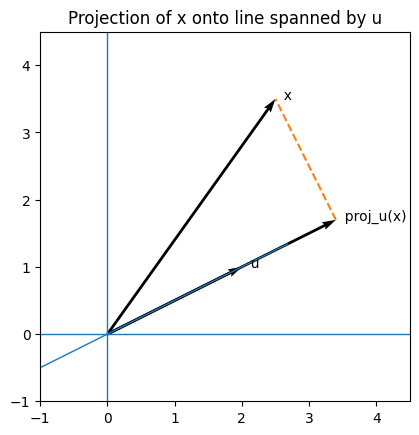

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.array([2.5, 3.5], dtype=float)
u = np.array([2.0, 1.0], dtype=float)  # projection direction

# Projection
alpha = (x @ u) / (u @ u)
x_proj = alpha * u
r = x - x_proj

# Plot
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)

# Line through origin in direction u
t = np.linspace(-3, 3, 200)
line = np.outer(t, u/np.linalg.norm(u))
ax.plot(line[:,0], line[:,1], linewidth=1)

# Vectors
ax.quiver(0,0, x[0],     x[1],     angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0, u[0],     u[1],     angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0, x_proj[0],x_proj[1],angles='xy', scale_units='xy', scale=1)

# Residual as dashed connector
ax.plot([x_proj[0], x[0]], [x_proj[1], x[1]], linestyle='--')

ax.set_xlim(-1, 4.5)
ax.set_ylim(-1, 4.5)
ax.set_title("Projection of x onto line spanned by u")
ax.text(x[0], x[1], "  x")
ax.text(u[0], u[1], "  u")
ax.text(x_proj[0], x_proj[1], "  proj_u(x)")

print("alpha:", alpha)
print("u^T r ≈ 0 ?", np.isclose(u @ r, 0.0, atol=1e-10))
plt.show()

alpha: 1.7
u^T r ≈ 0 ? True


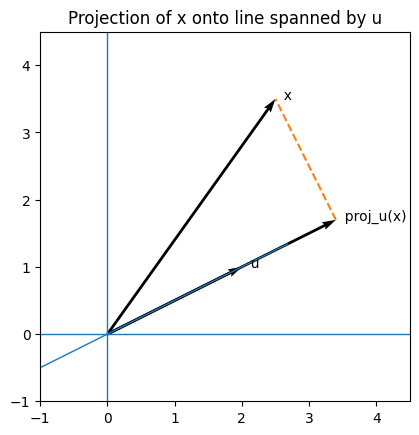

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# ---------------------------
# DATA: a point x and a direction u
# ---------------------------

x = np.array([2.5, 3.5], dtype=float)
# x is the vector (a point in 2D) we want to "drop" onto a line.
# Geometrically: imagine a light above x; its shadow on the line (through the origin)
# in direction u is the projection.

u = np.array([2.0, 1.0], dtype=float)  # projection direction
# u defines the line (through the origin) we are projecting onto.
# The "line spanned by u" means all multiples of u: { t * u : t ∈ ℝ }.
# NOTE: u must be nonzero. Its *direction* matters, not its length.

# ---------------------------
# PROJECTION: compute the closest point on the line to x
# ---------------------------

alpha = (x @ u) / (u @ u)
# alpha is a scalar. Intuition:
# - (x @ u) is how much x aligns with u (dot product).
# - (u @ u) is ||u||^2 (squared length of u).
# The ratio answers: "how many 'units of u' best match x along u?"

x_proj = alpha * u
# The actual projection point on the line. It's the multiple of u that lies closest to x.
# This minimizes distance ||x - t*u|| over t. (Set derivative to 0 ⇒ t = alpha.)

r = x - x_proj
# Residual vector from the projection point to x.
# KEY PROPERTY: r is orthogonal (perpendicular) to u (and thus to the line).
# This is what makes x_proj the *closest* point to x on that line.

# ---------------------------
# PLOT: draw the geometry to see the projection
# ---------------------------

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_aspect('equal', adjustable='box')
# 'equal' aspect so 1 unit on x- and y-axes looks the same (no distortion).

ax.axhline(0, linewidth=1)
ax.axvline(0, linewidth=1)
# Draw axes for reference.

# Line through origin in direction u (visualize the subspace we're projecting onto)
t = np.linspace(-3, 3, 200)
line = np.outer(t, u/np.linalg.norm(u))
# u/||u|| is the unit direction; multiplying by t traces points along the line.

ax.plot(line[:,0], line[:,1], linewidth=1)

# Vectors from the origin (draw x, u, and the projection x_proj)
ax.quiver(0,0, x[0],     x[1],     angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0, u[0],     u[1],     angles='xy', scale_units='xy', scale=1)
ax.quiver(0,0, x_proj[0],x_proj[1],angles='xy', scale_units='xy', scale=1)
# quiver draws arrows. We draw three:
# - x       : the original vector
# - u       : the direction defining the line
# - x_proj  : the projection of x onto the line

# Residual as dashed connector (shows the “perpendicular drop”)
ax.plot([x_proj[0], x[0]], [x_proj[1], x[1]], linestyle='--')
# This dashed segment is r = x - x_proj. It should be perpendicular to u.

ax.set_xlim(-1, 4.5)
ax.set_ylim(-1, 4.5)
ax.set_title("Projection of x onto line spanned by u")
ax.text(x[0], x[1], "  x")
ax.text(u[0], u[1], "  u")
ax.text(x_proj[0], x_proj[1], "  proj_u(x)")

print("alpha:", alpha)
print("u^T r ≈ 0 ?", np.isclose(u @ r, 0.0, atol=1e-10))
# Orthogonality check: dot(u, r) ≈ 0 means r ⟂ u (perpendicular).
# This is THE defining property of an orthogonal projection:
# (x - x_proj) is orthogonal to the subspace (here, the line).

plt.show()


Symmetric? True
Idempotent? True
A^T (x - Px) ≈ 0 ? True


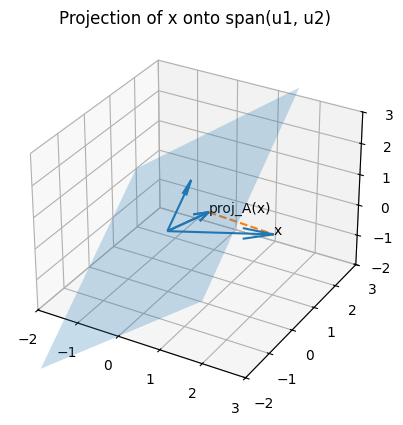

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D)

# ---------------------------
# SUBSPACE: a plane in R^3 spanned by two basis vectors u1, u2
# ---------------------------

u1 = np.array([1., 0., 1.])
u2 = np.array([0., 1., 1.])
A  = np.column_stack([u1, u2])  # Shape 3x2: columns are u1 and u2 (the basis of the plane)
# 'span(u1, u2)' is all linear combos a*u1 + b*u2 — geometrically, a plane through the origin.

x  = np.array([2., 1., 0.])     # The vector we will project onto that plane

# ---------------------------
# ORTHOGONAL PROJECTOR onto span(A)
# ---------------------------

P = A @ np.linalg.inv(A.T @ A) @ A.T
# P is the orthogonal projector matrix onto the column space of A (the plane).
# Formula: P_A = A (A^T A)^{-1} A^T  (requires A to have independent columns)
# Why it works: P maps any vector x to the closest point in the subspace span(A).

x_proj = P @ x
# The actual projection of x onto the plane — the point in the plane closest to x (in Euclidean distance).

r = x - x_proj
# Residual (error) vector from the projection point to x.
# KEY PROPERTY: r is orthogonal to the entire subspace (to every column of A).

# ---------------------------
# VISUALIZE the plane and the projection in 3D
# ---------------------------

# Build a grid patch of the plane: a*u1 + b*u2 for a,b in [-2, 2]
s = np.linspace(-2, 2, 20)
t = np.linspace(-2, 2, 20)
S, T = np.meshgrid(s, t)
plane = np.outer(S.ravel(), u1) + np.outer(T.ravel(), u2)  # (400 x 3) points on the plane
Xpl = plane[:,0].reshape(S.shape)
Ypl = plane[:,1].reshape(S.shape)
Zpl = plane[:,2].reshape(S.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(Xpl, Ypl, Zpl, alpha=0.25, linewidth=0)
# Semi-transparent surface to show the plane spanned by u1 and u2.

# Draw x and its projection from the origin as arrows
ax.quiver(0,0,0, x[0],     x[1],     x[2],     length=1, normalize=False)
ax.quiver(0,0,0, x_proj[0],x_proj[1],x_proj[2],length=1, normalize=False)
# These show the original vector x and the projected vector x_proj.

# Draw the residual as a dashed segment from x_proj to x
ax.plot([x_proj[0], x[0]], [x_proj[1], x[1]], [x_proj[2], x[2]], linestyle='--')
# Geometrically, this is the "perpendicular drop" to the plane.

# Also draw the basis vectors u1 and u2 for reference
ax.quiver(0,0,0, u1[0], u1[1], u1[2], length=1, normalize=False)
ax.quiver(0,0,0, u2[0], u2[1], u2[2], length=1, normalize=False)

ax.set_title("Projection of x onto span(u1, u2)")
ax.text(x[0], x[1], x[2], "x")
ax.text(x_proj[0], x_proj[1], x_proj[2], "proj_A(x)")
ax.set_xlim(-2, 3); ax.set_ylim(-2, 3); ax.set_zlim(-2, 3)

# ---------------------------
# FUNDAMENTAL PROJECTION CHECKS
# ---------------------------

print("Symmetric?", np.allclose(P, P.T))
# Orthogonal projectors are symmetric: P^T = P

print("Idempotent?", np.allclose(P@P, P))
# Projecting twice does nothing new: P^2 = P

print("A^T (x - Px) ≈ 0 ?", np.allclose(A.T @ r, np.zeros(2), atol=1e-10))
# Residual is orthogonal to the subspace: each column of A is orthogonal to r
# (these are the normal equations for projection / least squares)

plt.show()
